In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Localization

In [ ]:
!pip install pytesseract

In [ ]:
# Importing the Dependencies.
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from skimage.segmentation import clear_border
import pytesseract

# Loading test image

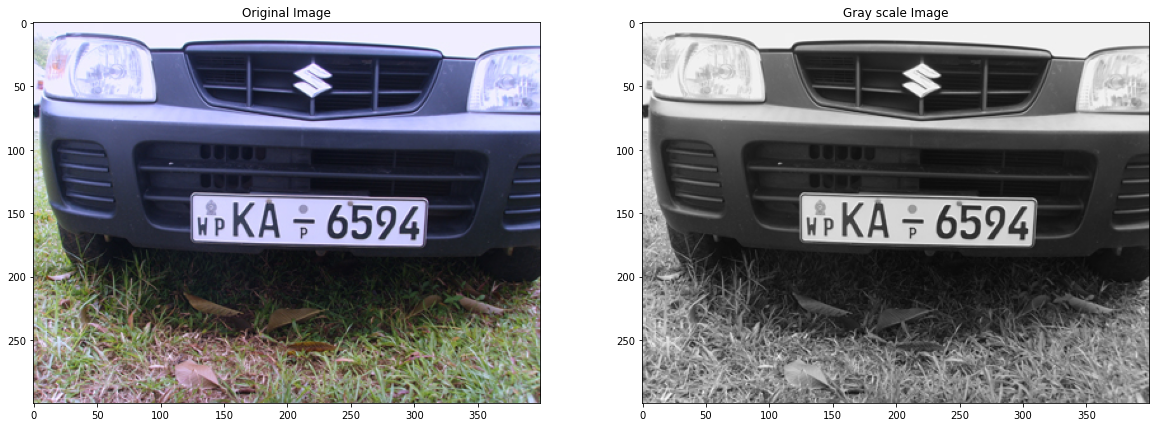

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/CO543/Lab Resources-20220113/data/img2.jpg'
img  = cv2.imread(path)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Original Image')
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax2.set_title('Gray scale Image')
Gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ax2.imshow(cv2.cvtColor(Gray, cv2.COLOR_GRAY2RGB))

# Finding the license plate candidate contours in an image

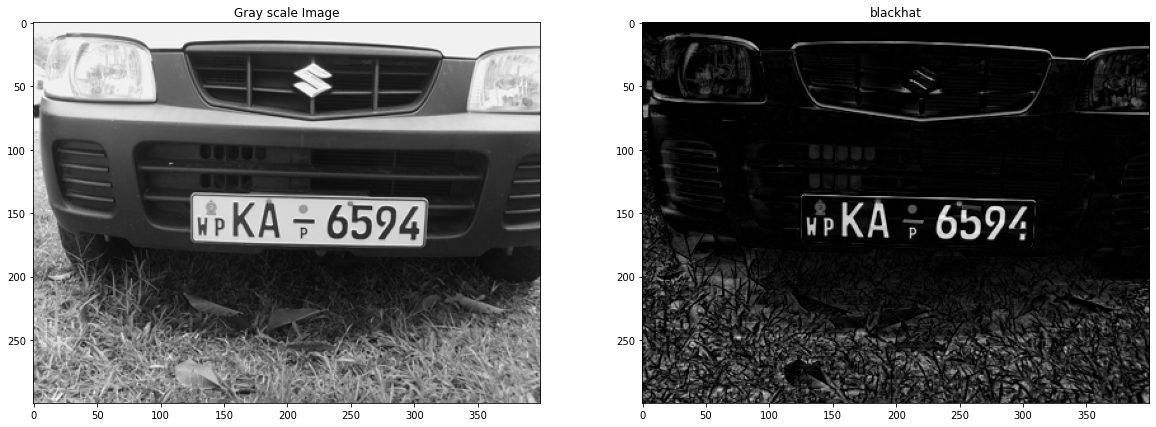

In [ ]:
# We are using morphological Transformations

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 3))
blackhat = cv2.morphologyEx(Gray, cv2.MORPH_BLACKHAT, kernel)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Gray scale Image')
ax1.imshow(cv2.cvtColor(Gray, cv2.COLOR_GRAY2RGB))
ax2.set_title('blackhat')
ax2.imshow(blackhat, cmap='gray')

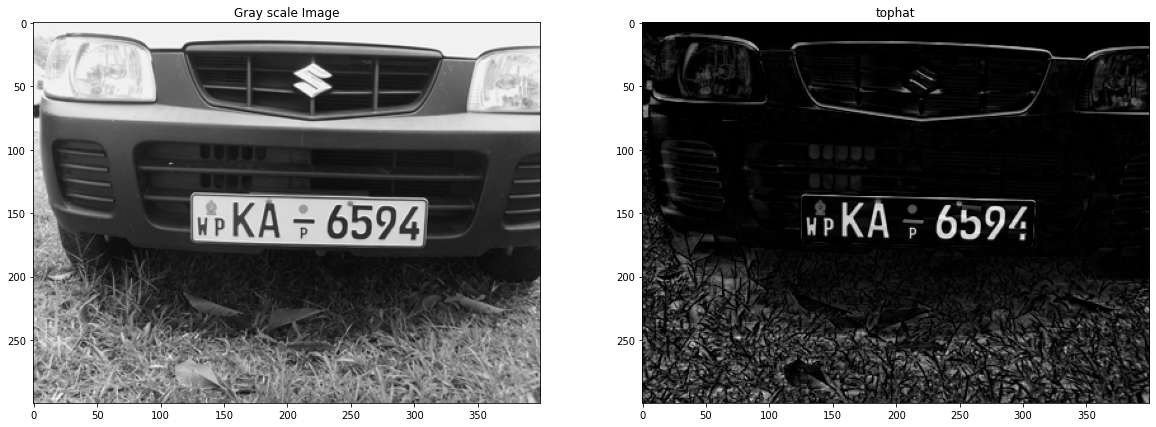

In [ ]:
tophat = cv2.morphologyEx(blackhat, cv2.MORPH_TOPHAT, kernel)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Gray scale Image')
ax1.imshow(cv2.cvtColor(Gray, cv2.COLOR_GRAY2RGB))
ax2.set_title('tophat')
ax2.imshow(tophat, cmap='gray')

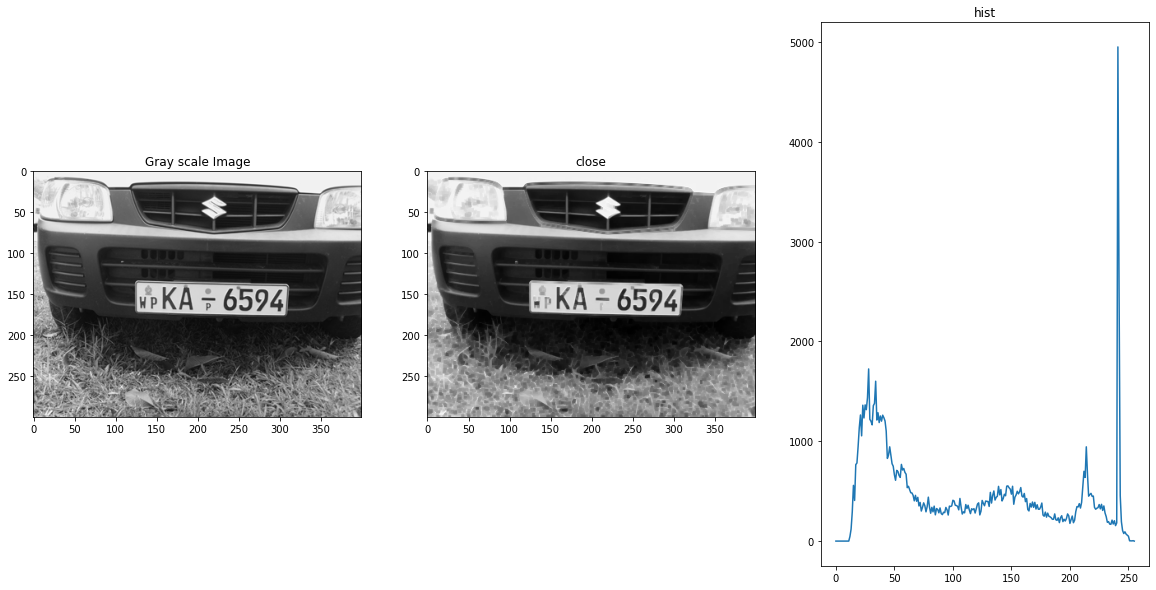

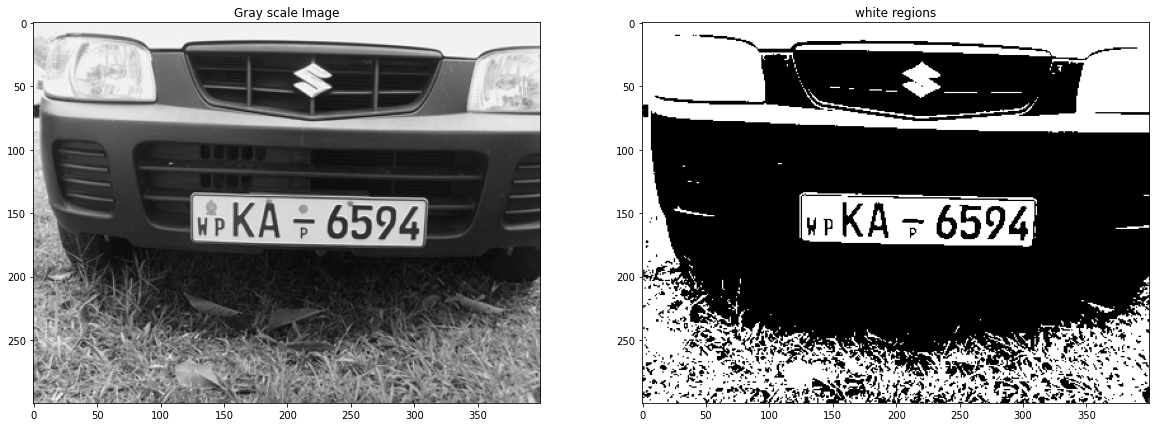

In [ ]:
squareKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
light = cv2.morphologyEx(Gray, cv2.MORPH_CLOSE, squareKernel)
hist = cv2.calcHist([light],[0],None,[256],[0,256])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.set_title('Gray scale Image')
ax1.imshow(cv2.cvtColor(Gray, cv2.COLOR_GRAY2RGB))
ax2.set_title('close')
ax2.imshow(light, cmap='gray')
ax3.set_title('hist')
ax3.plot(hist)

region = cv2.threshold(Gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Gray scale Image')
ax1.imshow(cv2.cvtColor(Gray, cv2.COLOR_GRAY2RGB))
ax2.set_title('white regions')
ax2.imshow(region, cmap='gray')

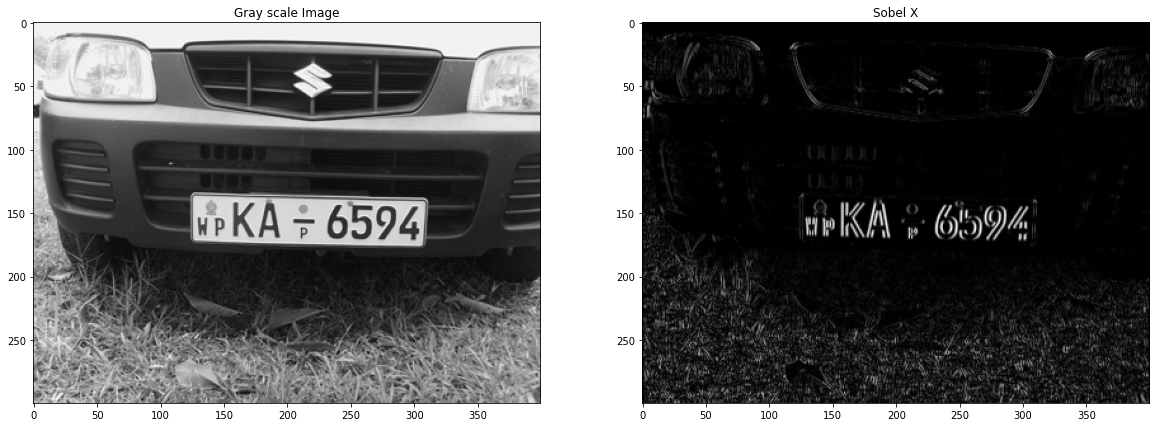

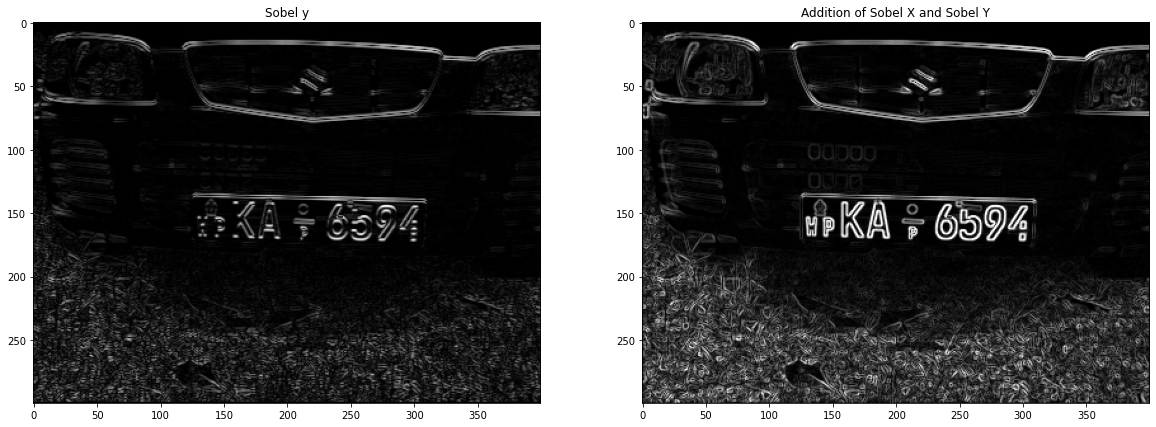

In [ ]:
Sobel_DX = cv2.Sobel(tophat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
sobel_DY = cv2.Sobel(tophat, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)

Abs_Sobel_DX = np.absolute(Sobel_DX)
(minVal, maxVal) = (np.min(Abs_Sobel_DX), np.max(Abs_Sobel_DX))
Scaled_img = 255 * ((Abs_Sobel_DX - minVal) / (maxVal - minVal))
Scaled_img1 = Scaled_img.astype("uint8")

Abs_Sobel_DY = np.absolute(sobel_DY)
(minVal, maxVal) = (np.min(Abs_Sobel_DY), np.max(Abs_Sobel_DX))
Scaled_img = 255 * ((Abs_Sobel_DY - minVal) / (maxVal - minVal))
Scaled_img2 = Scaled_img.astype("uint8")

dest = cv2.add(Scaled_img1, Scaled_img2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Gray scale Image')
ax1.imshow(cv2.cvtColor(Gray, cv2.COLOR_GRAY2RGB))
ax2.set_title('Sobel X')
ax2.imshow(Scaled_img1, cmap='gray')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Sobel y')
ax1.imshow(Scaled_img2, cmap='gray')
ax2.set_title('Addition of Sobel X and Sobel Y')
ax2.imshow(dest, cmap='gray')



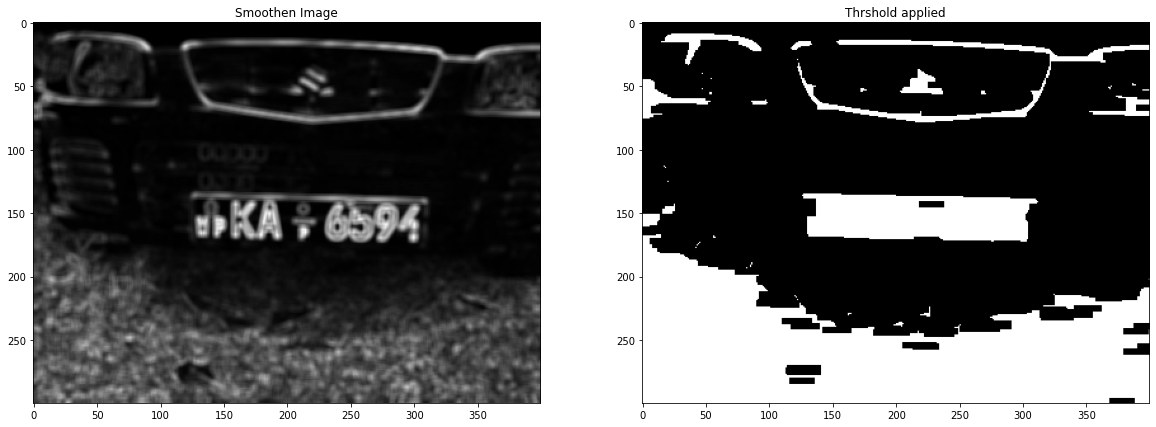

In [ ]:
smoothen_gradX = cv2.GaussianBlur(dest, (5,5), 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,5))
temp = cv2.morphologyEx(dest, cv2.MORPH_CLOSE, kernel)
thresh = cv2.threshold(temp, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Smoothen Image')
ax1.imshow(smoothen_gradX, cmap='gray')
ax2.set_title('Thrshold applied')
ax2.imshow(thresh, cmap='gray')


In [ ]:
Ethresh = cv2.erode(thresh, None, iterations=2)
smoothen_Ethresh = cv2.GaussianBlur(Ethresh, (5,5), 3)
Dthresh = cv2.dilate(smoothen_Ethresh, None, iterations=25)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Erosion')
ax1.imshow(smoothen_Ethresh, cmap='gray')
ax2.set_title('Dilation')
ax2.imshow(Dthresh, cmap='gray')

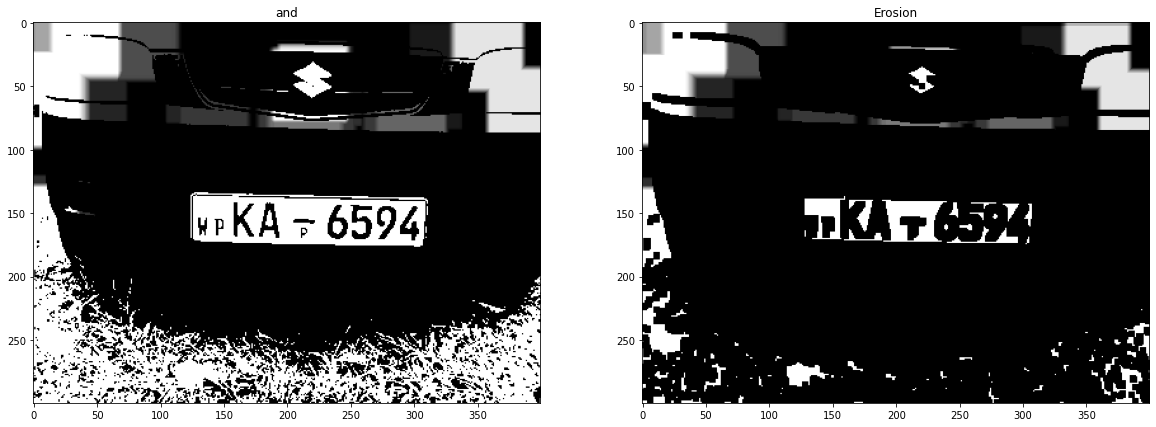

In [ ]:
D_and_l = cv2.bitwise_and(Dthresh, Dthresh, mask=region)
ED_and_l = cv2.erode(D_and_l, None, iterations=2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('and')
ax1.imshow(D_and_l, cmap='gray')
ax2.set_title('Erosion')
ax2.imshow(ED_and_l, cmap='gray')

2.2222222222222223
1.188118811881188
4.348837209302325
1.1954022988505748
###########
187 43


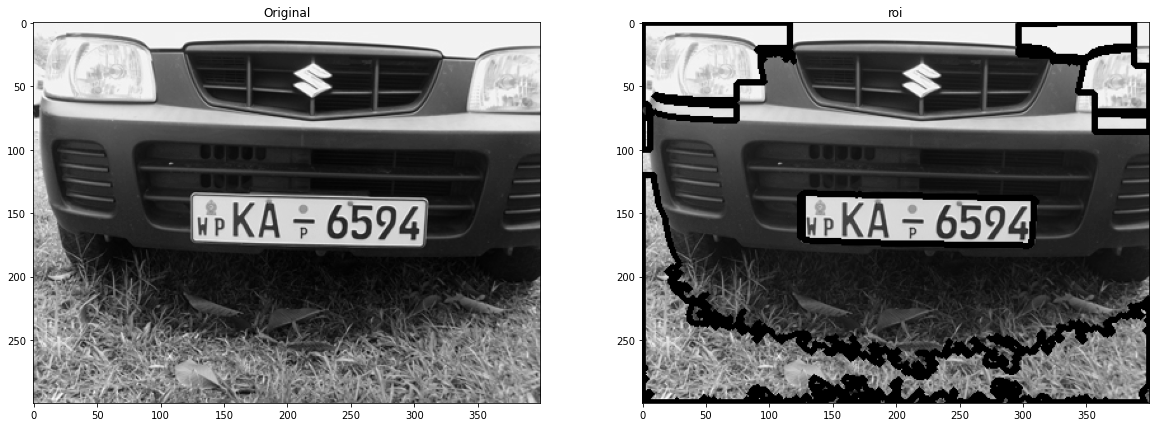

In [ ]:
cnts = cv2.findContours(D_and_l.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:4]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Original')
ax1.imshow(Gray, cmap='gray')
ax2.set_title('roi')
ax2.imshow(cv2.drawContours(Gray.copy(), cnts, -1, (0, 255, 0), 3), cmap='gray')

for i in cnts:
  (x,y,w,h) = cv2.boundingRect(i)
  aspect_ratio = w/float(h)
  print(aspect_ratio)

print('###########')

roi = None
for cont in cnts:
  (x,y,w,h) = cv2.boundingRect(cont)
  aspect_ratio = w/float(h)
  if(aspect_ratio <= 5 and aspect_ratio >= 3):
    print(w,h)
    licensePlate = Gray[y:y + h, x:x + w]
    roi = cv2.threshold(licensePlate, 0,255, cv2.THRESH_OTSU)[1]
    break


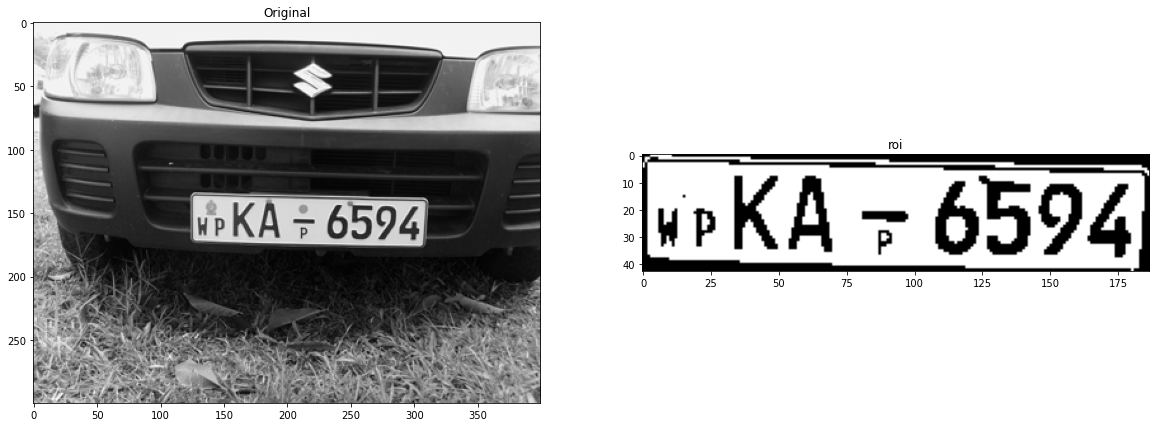

In [ ]:
 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Original')
ax1.imshow(Gray, cmap='gray')
ax2.set_title('roi')
ax2.imshow(roi, cmap='gray')
